# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Traffic accidents represent the leading cause of death and disability for young (16 to 36 years old) in saudi arabia. They are alone account for 53% of all injuries, and cost the country around 55 billion riyals annually. In this project I will investigate and study different factors to find the impact of new penalties for traffic violations on the rate of deaths and accidents in general. 

## Executive Summary

This project provides a dscriptive statistics about driving licenses, traffic accidents and casualties in saudi arabia. Methods of analysis include finding the relationship between features like number of driving licenses and accidents, calculate the death per day in each region, compare the rate of accidents over the years. Results of the data analysis show that driving licenses are increasing over the years, and the new penalties for traffic violations has a positive impact in droping the death rate, and that "Northern Border" and "Al-Jouf" region has the highest percentage of accidents.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
#import datasets
accidents=pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv', sep=';')
licenses=pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv', sep=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#display 10 rows
accidents.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [5]:
#display 10 rows
licenses.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:

#### Driving Licenses: 
> This dataset contains 5 columns 
- Unnamed: 0:             will be deleted
- Year:                   the year between (1993-2017)
- Administritive Area:    the regions of saudi arabia 
- Driving Liceses:        number of driving liceses issued
- geo_point_2d:           geo point of the regions

#### Traffic Accidents and Casualties: 
> This dataset contains 7 columns
- Unnamed: 0:             will be deleted
- Unnamed: 0.1:           will be deleted
- Year:                   the year between (2016-2017)
- Region:                 the regions of saudi arabia
- Indicator:              No. of Accidents/Dead/Injured
- Value:                  the value of Indicator column 
- geo_point_2d:           geo point of the regions

#### 4a. How complete is the data?

Investigate missing values etc.

In [6]:
#Code
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


In [7]:
licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [8]:
accidents[accidents['geo_point_2d'].isnull()].head()

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
29,29,29,(2016),Total,No. of Accidents,533380n,NaN
30,30,30,(2016),Total,No. of Casualties - Injured,38120n,NaN
68,68,68,(2017),Total,No. of Accidents,460488n,NaN
69,69,69,(2017),Total,No. of Casualties - Injured,33199n,NaN


In [9]:
licenses[licenses['geo_point_2d'].isnull()].head()

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
58,58,(2015),Total,435439n,NaN
59,59,(2017),Total,928165n,NaN
60,60,(1993),Total,294893n,NaN
61,61,(1994),Total,303520n,NaN
62,62,(2003),Total,254858n,NaN


In [10]:
accidents['Region'].value_counts()

Al-Jouf             6
Northern Boarder    6
Tabouk              6
Eastern Region      6
Madinah             6
Total               6
Qassim              6
Jazan               6
Al-Baaha            6
Riyadh              6
Asir                6
Makkah              6
Hail                6
Najran              6
Name: Region, dtype: int64

In [11]:
licenses['Administritive Area'].value_counts()

Madinah             25
Jazan               25
Riyadh              25
Assir               25
Najran              25
Tabouk              25
Northern Boarder    25
Hail                25
Al-Jouf             25
Al-Qaseem           25
Total               25
Al-Baha             25
Eastern             25
Makkah              25
Name: Administritive Area, dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [12]:
#Code
print(accidents.min())
print(accidents.max())

Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object
Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object


In [13]:
print(licenses.min())
print(licenses.max())

Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object
Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object


#### 5. What are your data types? 
Display the data types of each feature. 

In [14]:
#code
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


In [15]:
licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be? 

Answer:
- Unnamed columns should be deleted.
- the Value and Driving Liceses should be numerical

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [16]:
#function to convert to numeric
def convert_to_numeric(col):
    return col.apply(pd.to_numeric) 

- Make new columns `x` and `y` using `geo_point_2d`

In [17]:
#split the geo_point_2d to x and y
mask_acc=accidents['geo_point_2d'].notnull()
mask_lic=licenses['geo_point_2d'].notnull()
accidents['x']=accidents[mask_acc]['geo_point_2d'].apply(lambda x:x.split(',')[0])
accidents['y']=accidents[mask_acc]['geo_point_2d'].apply(lambda x:x.split(',')[1])
licenses['x']=licenses[mask_lic]['geo_point_2d'].apply(lambda x:x.split(',')[0])
licenses['y']=licenses[mask_lic]['geo_point_2d'].apply(lambda x:x.split(',')[1])

- Fix any individual values preventing other columns from being the appropriate type.

In [18]:
#fix the columns
#extract the numbers
accidents['Year'] = accidents.Year.str.extract('([\d]+)', expand=True)
licenses['Year'] = licenses.Year.str.extract('([\d]+)', expand=True)
#strip the n from value
accidents['Value'] = accidents['Value'].apply(lambda x:x.strip('n'))
licenses['Driving Liceses'] = licenses['Driving Liceses'].apply(lambda x:x.strip('n'))

In [19]:
accidents.head()

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
2,2,2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.90165499,37.2598581394
3,3,3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400845724,41.4406960508
4,4,4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400845724,41.4406960508


In [20]:
licenses.head()

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628962766,41.2636898334


- Finish your data modifications by making sure the columns are now typed appropriately.

In [21]:
#convert columns to numeric datatype
accidents['Value']=convert_to_numeric(accidents['Value'])
licenses['Driving Liceses']= convert_to_numeric(licenses['Driving Liceses'])
accidents['Year']=convert_to_numeric(accidents['Year'])
licenses['Year']= convert_to_numeric(licenses['Year'])

- Display the data types again to confirm they are correct.

In [22]:
#Code:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null int64
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null int64
geo_point_2d    78 non-null object
x               78 non-null object
y               78 non-null object
dtypes: int64(4), object(5)
memory usage: 6.0+ KB


In [23]:
licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null int64
Administritive Area    350 non-null object
Driving Liceses        350 non-null int64
geo_point_2d           325 non-null object
x                      325 non-null object
y                      325 non-null object
dtypes: int64(3), object(4)
memory usage: 19.2+ KB


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [24]:
#drop unnecessary columns
accidents=accidents.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
licenses=licenses.drop(['Unnamed: 0'], axis=1)

In [25]:
#rename columns 
accidents.rename(columns={
        'Year':'year',
        'Value':'value',
        'Region':'region',
        'Indicator':'indicator',
    }, inplace=True) 

In [26]:
#rename columns 
licenses.rename(columns={
        'Year':'year',
        'Administritive Area':'region',
        'Driving Liceses':'driving_licenses',
    }, inplace=True) 

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|Year|int|Licenses|the year between (1993-2017)| 
|Region|object|Licenses|the regions of saudi arabia|
|Driving Licenses|int|Licenses|number of driving liceses issued|
|x|object|Licenses|geo x point of the regions|
|y|object|Licenses|geo y point of the regions|
|Year|int|Accidents|the year between (2016-2017)|
|Region|object|Accidents|the regions of saudi arabia|
|Indicator|object|Accidents|No. of Accidents/Dead/Injured|
|Value|int|Accidents|the value of Indicator column|
|x|object|Accidents|geo x point of the regions|
|y|object|Accidents|geo y point of the regions|

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [27]:
accidents['region'].value_counts()

Al-Jouf             6
Northern Boarder    6
Tabouk              6
Eastern Region      6
Madinah             6
Total               6
Qassim              6
Jazan               6
Al-Baaha            6
Riyadh              6
Asir                6
Makkah              6
Hail                6
Najran              6
Name: region, dtype: int64

In [28]:
licenses['region'].value_counts()

Madinah             25
Jazan               25
Riyadh              25
Assir               25
Najran              25
Tabouk              25
Northern Boarder    25
Hail                25
Al-Jouf             25
Al-Qaseem           25
Total               25
Al-Baha             25
Eastern             25
Makkah              25
Name: region, dtype: int64

In [29]:
#Remove the rows that are not associated with regions
accidents=accidents[accidents.region != 'Total']
licenses=licenses[licenses.region != 'Total']

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

License is wide, and the Accident is long.

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

The wide is best for both

In [30]:
#Transform accidents dataset to wide
accidents_wide = pd.pivot_table(accidents, columns=['indicator'], values='value',
                            index=['year','region'])

In [31]:
accidents_wide.head()

indicator            No. of Accidents  No. of Casualties - Dead  \
year region                                                       
2016 Al-Baaha                    3618                       185   
     Al-Jouf                    10212                       245   
     Asir                       32684                       983   
     Eastern Region            101619                      1113   
     Hail                       10199                       299   

indicator            No. of Casualties - Injured  
year region                                       
2016 Al-Baaha                               1227  
     Al-Jouf                                 920  
     Asir                                   2541  
     Eastern Region                         4893  
     Hail                                    932

In [32]:
accidents_wide = accidents_wide.reset_index()
accidents_wide.columns.name = None

In [33]:
accidents_wide.head()

,year,region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016,Al-Baaha,3618,185,1227
1,2016,Al-Jouf,10212,245,920
2,2016,Asir,32684,983,2541
3,2016,Eastern Region,101619,1113,4893
4,2016,Hail,10199,299,932


#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [34]:
#disply the values of regions
columns1= list(licenses['region']) + list(accidents_wide['region'])
columns = set(columns1)
columns

{'Al-Baaha',
 'Al-Baha',
 'Al-Jouf',
 'Al-Qaseem',
 'Asir',
 'Assir',
 'Eastern',
 'Eastern Region',
 'Hail',
 'Jazan',
 'Madinah',
 'Makkah',
 'Najran',
 'Northern Boarder',
 'Qassim',
 'Riyadh',
 'Tabouk'}

In [35]:
#make the same values in both datasets
accidents_wide['region'] = accidents_wide['region'].replace('Al-Baaha', 'Al-Baha')
accidents_wide['region'] = accidents_wide['region'].replace('Qassim', 'Al-Qaseem')
licenses['region'] = licenses['region'].replace('Eastern', 'Eastern Region')
licenses['region'] = licenses['region'].replace('Assir', 'Asir')

In [36]:
#mege the datasets to one
combined_datasets=pd.merge(licenses, accidents_wide, on=['year','region'], how='left')

In [37]:
combined_datasets.rename(columns={
        'No. of Accidents':'accidents',
        'No. of Casualties - Dead':'dead',
        'No. of Casualties - Injured':'injured',
    }, inplace=True) 

In [38]:
combined_datasets[combined_datasets['year']==2017].head()

,year,region,driving_licenses,geo_point_2d,x,y,accidents,dead,injured
27,2017,Hail,22035,"27.400845724, 41.4406960508",27.400845724,41.4406960508,9379.0,265.0,773.0
32,2017,Northern Boarder,5280,"30.197074783, 41.8171186952",30.197074783,41.8171186952,11540.0,112.0,374.0
80,2017,Al-Qaseem,6318,"26.1967063704, 43.3429998455",26.1967063704,43.3429998455,22405.0,319.0,1446.0
88,2017,Eastern Region,126816,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439,81433.0,963.0,4073.0
95,2017,Tabouk,10232,"27.90165499, 37.2598581394",27.90165499,37.2598581394,11713.0,348.0,1243.0


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [39]:
#save combined datasets
combined_datasets.to_csv(path_or_buf='../data/combined_datasets.csv',index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [40]:
#Code:
combined_datasets.describe()

,year,driving_licenses,accidents,dead,injured
count,325.000000,325.000000,26.000000,26.000000,26.000000
mean,2005.000000,28915.347692,38225.692308,635.384615,2743.038462
std,7.222222,47419.058819,46493.705035,549.783381,2922.641127
min,1993.000000,915.000000,1414.000000,112.000000,374.000000
25%,1999.000000,4846.000000,10276.250000,241.250000,923.000000
50%,2005.000000,10267.000000,16050.500000,415.500000,1618.500000
75%,2011.000000,25423.000000,30981.250000,929.250000,3784.000000
max,2017.000000,495307.000000,145541.000000,2243.000000,12383.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [41]:
#function to calculate std 
def calculate_std(l):
    mean = sum(l) / len(l)  
    var=sum(pow(x-mean,2) for x in l) / len(l)
    std  = math.sqrt(var)
    return std

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [42]:
#Code:
columns = combined_datasets.select_dtypes([np.number]).columns
columns = [x for x in columns if x != 'year']
sd={column : calculate_std(combined_datasets[column].dropna()) for column in columns}

In [43]:
sd

{'driving_licenses': 47346.0502174464,
 'accidents': 45590.82869880505,
 'dead': 539.1069593406002,
 'injured': 2865.885411322023}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

In [44]:
#using numpy
np.std(combined_datasets['accidents'])

45590.82869880505

the manually calculated standard match numpy std method, because numpy takes (n) but describe takes (n-1).

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [45]:
#Driving Licenses based on years (1993 - 2017)
combined_datasets.groupby(['region'])['driving_licenses'].sum().sort_values(ascending=False).reset_index(name='sum')

,region,sum
0,Makkah,2433659
1,Riyadh,2243304
2,Eastern Region,2147243
3,Al-Qaseem,562292
4,Asir,490615
5,Madinah,349084
6,Hail,257782
7,Jazan,214066
8,Tabouk,203849
9,Al-Jouf,164652


In [46]:
#mean Traffic Accidents numbers for years (2016 - 2017)
mask_16_17=(combined_datasets['year']== 2016) | (combined_datasets['year']== 2017)
combined_datasets[mask_16_17].groupby(['region'])['accidents'].mean().sort_values(ascending=False).reset_index(name='mean')

,region,mean
0,Makkah,140189.5
1,Riyadh,120830.5
2,Eastern Region,91526.0
3,Asir,28964.5
4,Al-Qaseem,24034.5
5,Jazan,24017.0
6,Madinah,15272.5
7,Tabouk,13872.0
8,Northern Boarder,12368.0
9,Al-Jouf,10340.5


In [47]:
#the regions that have more Driving Licenses issued in each year than the year average
means=combined_datasets.groupby(['year'])['driving_licenses'].mean()
combined_coby=combined_datasets.copy()
combined_coby['driving_licenses_mean']=combined_coby['year'].apply(lambda x:means[x])
more_than_mean=combined_coby[combined_coby['driving_licenses']> combined_coby['driving_licenses_mean']]
more_than_mean.sort_values(by='year')[['year','region','driving_licenses','driving_licenses_mean']].head()

,year,region,driving_licenses,driving_licenses_mean
167,1993,Makkah,65977,22684.076923
137,1993,Riyadh,103886,22684.076923
300,1993,Al-Qaseem,73618,22684.076923
1,1994,Makkah,75349,23347.692308
139,1994,Riyadh,110545,23347.692308


In [48]:
#the regions that have more Traffic Accidents happened in each year than the year average
means=combined_datasets.groupby(['year'])['accidents'].mean()
combined_coby=combined_datasets.copy()
combined_coby['accidents_mean']=combined_coby['year'].apply(lambda x:means[x])
more_than_mean=combined_coby[combined_coby['accidents']> combined_coby['accidents_mean']]
more_than_mean.sort_values(by='year')[['year','region','accidents','accidents_mean']]

,year,region,accidents,accidents_mean
143,2016,Makkah,134838.0,41029.230769
235,2016,Eastern Region,101619.0,41029.230769
272,2016,Riyadh,141736.0,41029.230769
88,2017,Eastern Region,81433.0,35422.153846
142,2017,Makkah,145541.0,35422.153846
271,2017,Riyadh,99925.0,35422.153846


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

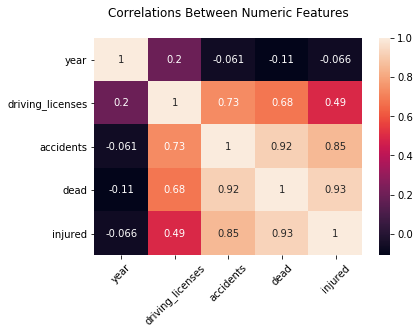

In [49]:
sns.heatmap(combined_datasets.corr(),annot=True);
plt.xticks(rotation=45)
plt.savefig('../fig/Correlations Between Numeric Features.png');
plt.title('Correlations Between Numeric Features\n');

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [50]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

/Users/mzoon/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mzoon/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


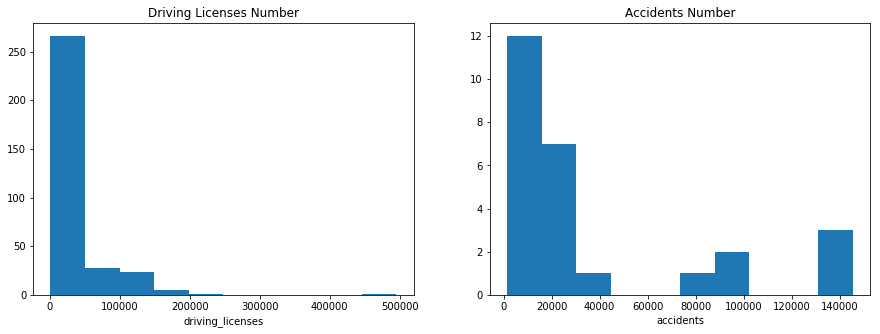

In [51]:
# Code
subplot_histograms(combined_datasets, ['driving_licenses','accidents'],
                                      ['Driving Licenses Number','Accidents Number'],
                                      ['driving_licenses','accidents'])

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [52]:
# Code
def subplot_scatterplots(dataframe, list_of_columns_x,list_of_columns_y, list_of_mask_x, list_of_mask_y, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns_x)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, (x,y) in enumerate(zip(list_of_columns_x,list_of_columns_x)): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[list_of_mask_x[i]][x], dataframe[list_of_mask_y[i]][y], alpha= .7) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
        plt.savefig('../fig/'+list_of_titles[i]+'.png');

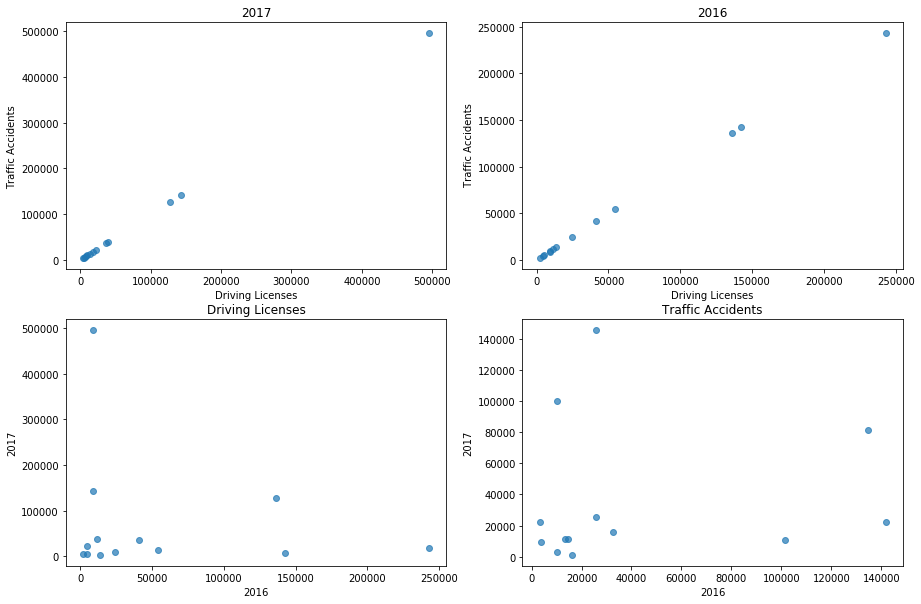

In [53]:
mask_16= combined_datasets['year']== 2016
mask_17= combined_datasets['year']== 2017
subplot_scatterplots(combined_datasets, ['driving_licenses','driving_licenses','driving_licenses','accidents'],
                                        ['accidents','accidents','driving_licenses','accidents'],
                                        [mask_17,mask_16,mask_16,mask_16],
                                        [mask_17,mask_16,mask_17,mask_17],
                                        ['2017','2016','Driving Licenses','Traffic Accidents'],
                                        ['Driving Licenses','Driving Licenses','2016','2016'],
                                        ['Traffic Accidents',' Traffic Accidents','2017','2017'])

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

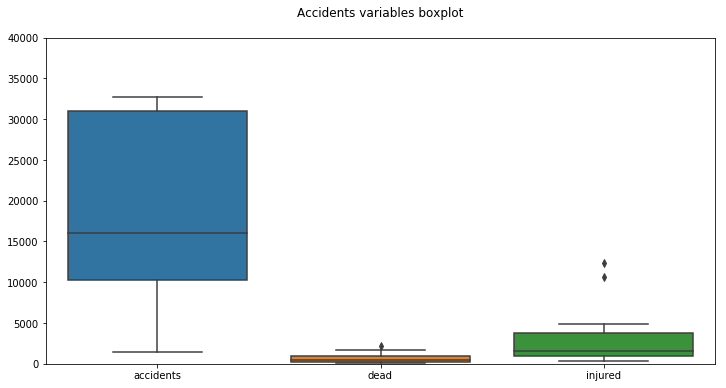

In [54]:
# Code
plt.figure(figsize=(12,6))
sns.boxplot(data=combined_datasets[['accidents','dead','injured']])
plt.title('Accidents variables boxplot\n')
plt.ylim(0, 40000);
plt.show()

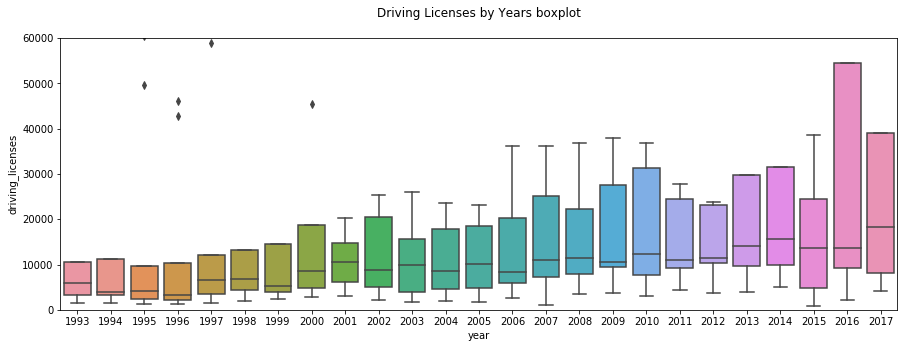

In [55]:
plt.figure(figsize=(15,5))
sns.boxplot(x="year", y="driving_licenses", data=combined_datasets)
plt.title('Driving Licenses by Years boxplot\n')
plt.ylim(0, 60000);
plt.show()

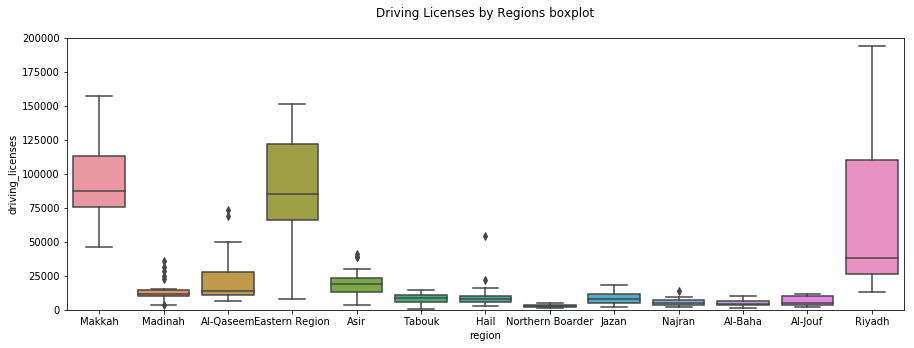

In [56]:
plt.figure(figsize=(15,5))
sns.boxplot(x="region", y="driving_licenses", data=combined_datasets)
plt.title('Driving Licenses by Regions boxplot\n')
plt.ylim(0, 200000);
plt.savefig('../fig/Driving Licenses by Regions boxplot.png');
plt.show()

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

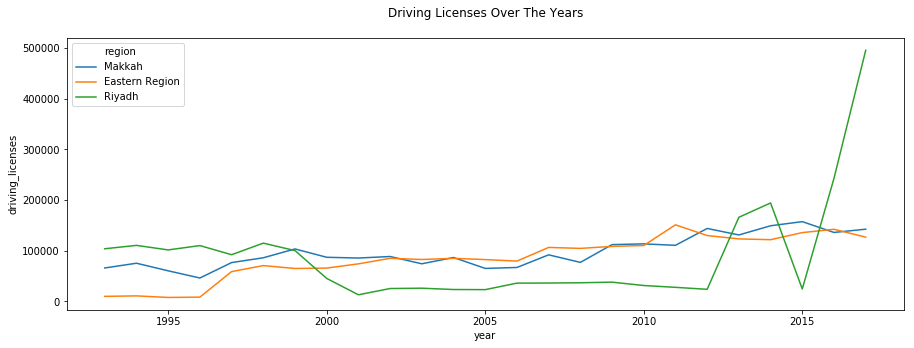

In [57]:
plt.figure(figsize=(15,5))
data = combined_datasets[(combined_datasets['region']== 'Riyadh') |(combined_datasets['region']== 'Eastern Region')|(combined_datasets['region']== 'Makkah')]
sns.lineplot(x= "year", y="driving_licenses",hue="region", data=data)
plt.title('Driving Licenses Over The Years\n')
plt.show()

In [58]:
dead=(combined_datasets[mask_16_17].groupby(['year','region'])['dead'].sum()/365).reset_index(name='dead per day')
dead.head()

,year,region,dead per day
0,2016,Al-Baha,0.506849
1,2016,Al-Jouf,0.671233
2,2016,Al-Qaseem,1.087671
3,2016,Asir,2.693151
4,2016,Eastern Region,3.049315


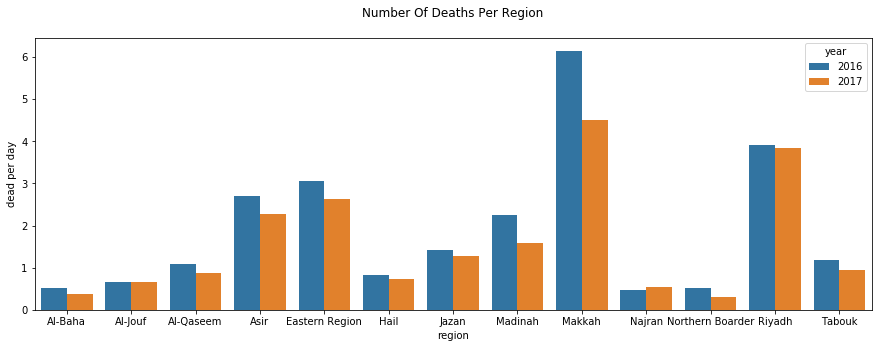

In [59]:
plt.figure(figsize=(15,5))
plt.title('Number Of Deaths Per Region\n')
sns.barplot(x="region", y="dead per day", hue="year", data=dead);

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

When a distribution is positively skewed, the mean is greater than the median, which is greater than the mode.

Positive skew: **median < mean**

In [60]:
def statistics (l):
    mean=np.mean(l)
    median=np.median(l)
    var=np.var(l)
    std=np.std(l)
    if mean<median:
        kewness='Negative skew'
    elif mean>median:
        kewness='Positive skew'
    else:
        kewness='Symmetric'
    return 'mean: {}, median: {},\nvariance: {}, standard deviation: {},\nskewness: {}'.format(mean,median,var,std,kewness)    

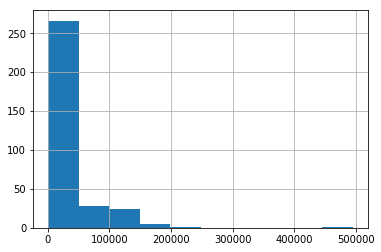

mean: 28915.347692307692, median: 10267.0,
variance: 2241648471.1929564, standard deviation: 47346.0502174464,
skewness: Positive skew


In [61]:
combined_datasets['driving_licenses'].hist();
plt.show();
print(statistics(combined_datasets['driving_licenses']))

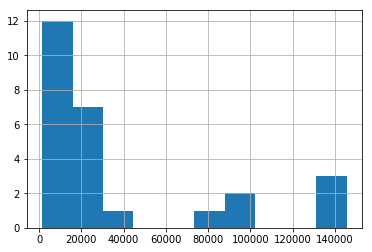

mean: 38225.692307692305, median: 16050.5,
variance: 2078523661.4437866, standard deviation: 45590.82869880505,
skewness: Positive skew


In [62]:
combined_datasets['accidents'].hist();
plt.show();
print(statistics(combined_datasets['accidents'].dropna()))

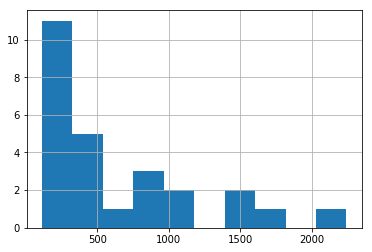

mean: 635.3846153846154, median: 415.5,
variance: 290636.3136094675, standard deviation: 539.1069593406002,
skewness: Positive skew


In [63]:
combined_datasets['dead'].hist();
plt.show();
print(statistics(combined_datasets['dead'].dropna()))

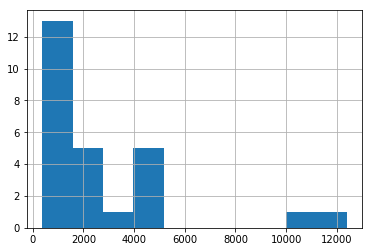

mean: 2743.0384615384614, median: 1618.5,
variance: 8213299.190828402, standard deviation: 2865.885411322023,
skewness: Positive skew


In [64]:
combined_datasets['injured'].hist();
plt.show();
print(statistics(combined_datasets['injured'].dropna()))

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

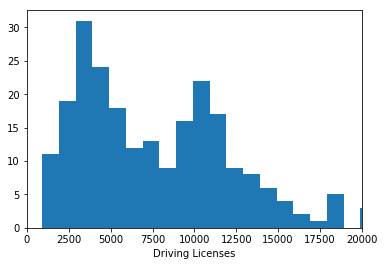

In [65]:
binsize = 1000
bins = np.arange(combined_datasets['driving_licenses'].min()-binsize, combined_datasets['driving_licenses'].max()+binsize, binsize)
plt.hist(data = combined_datasets, x = 'driving_licenses', bins = bins)
plt.xlabel('Driving Licenses');
plt.xlim(0, 20000);

the distribution is not normal because some region are bigger than the others and have more people, so I will siplit the dataset to see.

In [66]:
# split (Riyadh,Eastern Region,Makkah) from the others 
split1=combined_datasets[(combined_datasets['region']== 'Riyadh') |(combined_datasets['region']== 'Eastern Region')|(combined_datasets['region']== 'Makkah')]
split2=combined_datasets[(combined_datasets['region']!= 'Riyadh') &(combined_datasets['region']!= 'Eastern Region')&(combined_datasets['region']!= 'Makkah')]

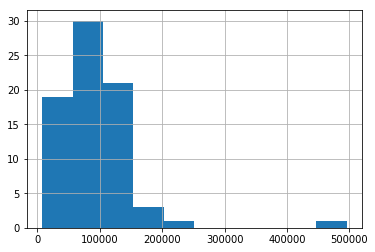

In [67]:
#Riyadh,Eastern Region,Makkah
split1['driving_licenses'].hist();

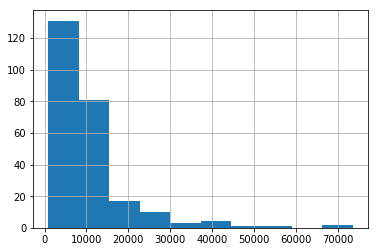

In [68]:
#others
split2['driving_licenses'].hist();

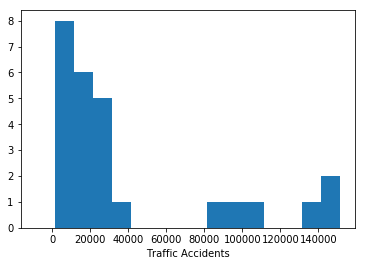

In [69]:
#Traffic Accidents
binsize = 10000
bins = np.arange(combined_datasets['accidents'].min()-binsize, combined_datasets['accidents'].max()+binsize, binsize)
plt.hist(data = combined_datasets, x = 'accidents', bins = bins)
plt.xlabel('Traffic Accidents');

skewed distribution is likely to have outliers in the direction of the skew.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

> **H0:** The difference in number of accidents between the experimental and control groups is 0.

> **H1:** The difference in number of accidents between the experimental and control groups is not 0.

In [70]:
import scipy.stats as stats
#control: 2016 experimental:2017
control = combined_datasets[combined_datasets['year']== 2016]['accidents']
experimental = combined_datasets[combined_datasets['year']== 2017]['accidents']        
t_test_result = stats.ttest_ind(experimental, control)

In [71]:
t_test_result.statistic

-0.301826481013749

In [72]:
t_test_result.pvalue

0.7653843025408006

> **H0:** The difference in driving liceses between the experimental and control groups is 0.

> **H1:** The difference in driving liceses between the experimental and control groups is not 0.

In [73]:
#control: 1993 experimental:2017
control = combined_datasets[combined_datasets['year']== 1993]['driving_licenses']
experimental = combined_datasets[combined_datasets['year']== 2017]['driving_licenses']        
t_test_result = stats.ttest_ind(experimental, control)

In [74]:
t_test_result.statistic

1.2583752322883466

In [75]:
t_test_result.pvalue

0.22036067703622106

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

Extra data for the year of 2018 was found and will be added.

In [76]:
#pre processing the new data then add it to the old data
accidents_extra=pd.read_csv('../data/saudi-arabia-traffic-accidents-and-casualties.csv', sep=';')
licenses_extra=pd.read_csv('../data/saudi-arabia-driving-licenses-issued-in-the-kingdom.csv', sep=';')

accidents_extra = pd.pivot_table(accidents_extra, columns=['Indicator'], values='Value',
                            index=['Year','Region'])
accidents_extra = accidents_extra.reset_index()
accidents_extra.columns.name = None

licenses_extra.rename(columns={
        'Administritive Area':'region',
        'Number of Driving Licenses':'driving_licenses',
        'Year':'year',
    }, inplace=True) 

accidents_extra.rename(columns={
        'Region':'region',
        'No. of Accidents':'accidents',
        'No. of Casualties - Dead':'dead',
        'No. of Casualties - Injured':'injured',
        'Year':'year',
    }, inplace=True) 

licenses_extra=licenses_extra[licenses_extra.region != 'Total']

licenses_extra['x']=licenses_extra['geo_point_2d'].apply(lambda x:x.split(',')[0])
licenses_extra['y']=licenses_extra['geo_point_2d'].apply(lambda x:x.split(',')[1])

licenses_extra=licenses_extra.drop(['geo_shape'], axis=1)

accidents_extra['region'] = accidents_extra['region'].replace('Qassim', 'Al-Qaseem')
accidents_extra['region'] = accidents_extra['region'].replace('Northern Borders', 'Northern Boarder')
licenses_extra['region'] = licenses_extra['region'].replace('Assir', 'Asir')
licenses_extra['region'] = licenses_extra['region'].replace('Eastern', 'Eastern Region')

combined_extra=pd.merge(licenses_extra, accidents_extra, on=['year','region'], how='left')

combined=pd.concat([combined_extra, combined_datasets], ignore_index=True, axis=0)

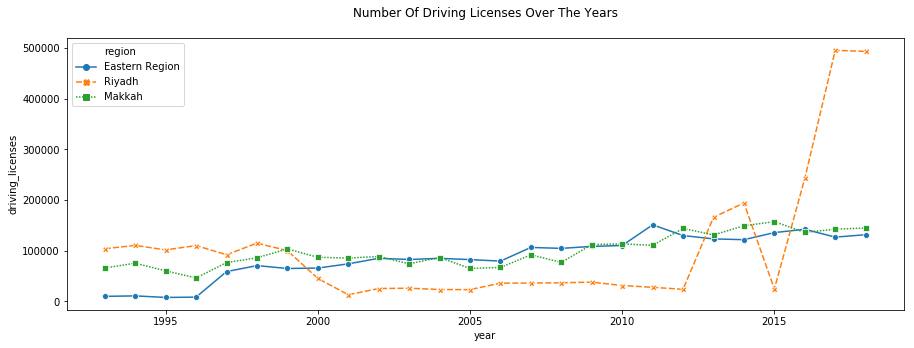

In [77]:
plt.figure(figsize=(15,5))
data = combined[(combined['region']== 'Riyadh') |(combined['region']== 'Eastern Region')|(combined['region']== 'Makkah')]
sns.lineplot(x= "year", y="driving_licenses",hue="region", data=data, style="region", markers=True)
plt.title('Number Of Driving Licenses Over The Years\n')
plt.savefig('../fig/Number Of Driving Licenses Over The Years.png');
plt.show()

The number of driving licenses has increased over the years, and as you saw earlier there is a linear relationship between number of driving licenses and number of accidents.

Saudi Arabia has reported more than a 37 percent drop in deaths rate caused by traffic accidents following the implementation of automated Saher system, according to a study by the Riyadh-based King Abdullah International Medical Research Center (KAIMRC).

“The introduction of Saher system has reduced the severity of traffic accident injuries by 20 percent and mortality rate by 37.8 percent,” said Sulaiman Al-Ghannam, principal investigator.

He said that the study “provided evidence of relationship between implementing the Saher system and reducing the severity of injuries and the mortality rate due to traffic accidents.”[source](https://www.arabnews.com/node/1095606/saudi-arabia)

Now, I will calculate the percent of death between 2016-2018.

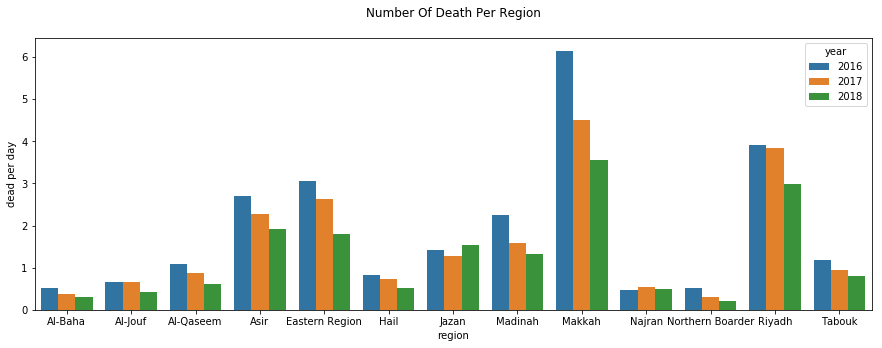

In [86]:
dead=(combined.dropna().groupby(['year','region'])['dead'].sum()/365).reset_index(name='dead per day')
plt.figure(figsize=(15,5))
plt.title('Number Of Death Per Region\n')
sns.barplot(x="region", y="dead per day", hue="year", data=dead);
plt.savefig('../fig/Number Of Death Per Region.png');

In [79]:
#calculate death rate
dead_year=combined.dropna().groupby(['year'])['dead'].sum()
(dead_year[2016]-dead_year[2018])/dead_year[2016]

0.3328535045952829

As you can see the death rate drops by 33 percent.

Now, I will add new data [source](https://www.stats.gov.sa/ar/930), and I want to investigate whether the drop of death is due decreasing in nember of men or not.

In [80]:
extra=pd.read_csv('../data/extra-data-2016-2018.csv')

In [81]:
extra.head()

,year,region,inside,outside,total,violations,saudi,non-saudi,all males
0,2016,Riyadh,114408,27328,141736,NaN,2376366,2365870,4742236
1,2016,Makkah,101507,33331,134838,NaN,2253782,2485601,4739383
2,2016,Madinah,7451,7024,14475,NaN,679709,486512,1166221
3,2016,Al-Qasseem,15389,10275,25664,NaN,502110,298819,800929
4,2016,Eastern Region,72821,28798,101619,NaN,1608377,1262425,2870802


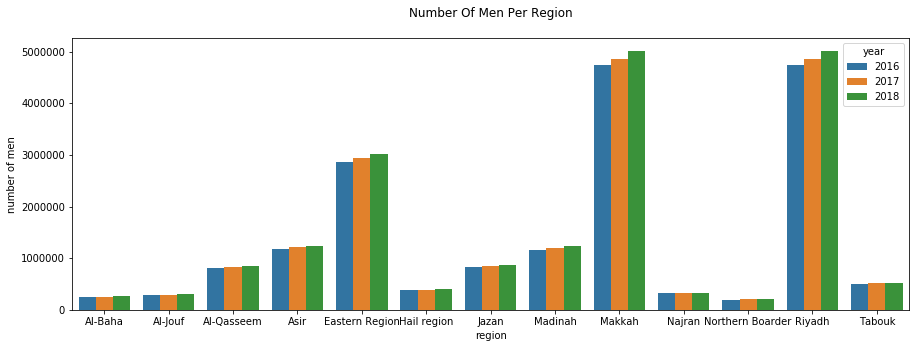

In [87]:
men=extra.groupby(['year','region'])['all males'].sum().reset_index(name='number of men')
plt.figure(figsize=(15,5))
plt.title('Number Of Men Per Region\n')
sns.barplot(x="region", y="number of men", hue="year", data=men);
plt.savefig('../fig/Number Of Men Per Region.png');

As you can see the number of men accually increased over the years, so I can say that it is not the reason of droping death rate. so it could be due to apply the new penalties for traffic violations.

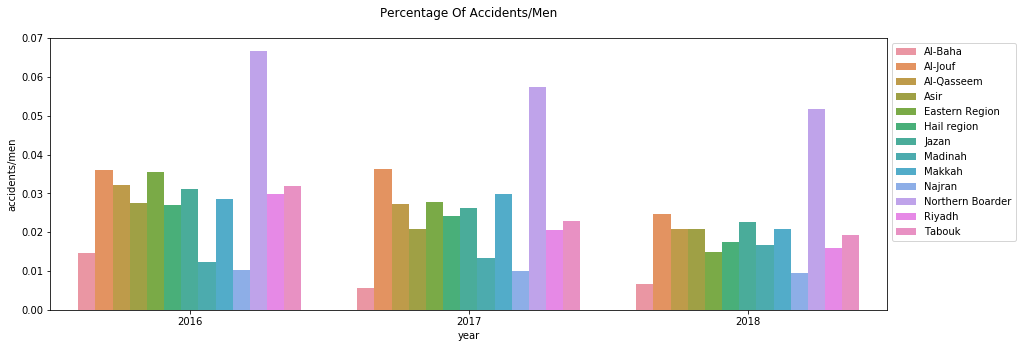

In [88]:
plt.figure(figsize=(15,5))
percentage=((extra.groupby(['year','region'])['total'].sum())/(extra.groupby(['year','region'])['all males'].sum())).reset_index(name='accidents/men')
plt.title('Percentage Of Accidents/Men\n')
sns.barplot(x="year", y="accidents/men", hue="region", data=percentage);
plt.legend(bbox_to_anchor=(1, 1), loc=2);
plt.savefig('../fig/Percentage Of Accidents-Men.png');

here is the percentage of accidents/men for each region, you can see clearly that "Northern Border" and "Al-Jouf" has the highest percentage. but over the year the percentage has decreased in nearly all the region.

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:

In conclusions I can say that the new penalties for traffic violations has a positive impact in droping the death rate, and that in general driving licenses are increased over the years. The regions "Northern Border" and "Al-Jouf" has the highest percentage of accidents and that require further investigation.   

Recommendations include:
- strict in applying penalties for traffic violations.
- mandatory driver education in schools or through licensed agencies.
- strict testing and licensing procedures for both nationals and expatriates.
- public education of traffic laws through the media.

I found some additional data for years (2016-2018), but it would be better if it was for all the years.

In [85]:
extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
year          39 non-null int64
region        39 non-null object
inside        39 non-null int64
outside       39 non-null int64
total         39 non-null int64
violations    26 non-null float64
saudi         39 non-null int64
non-saudi     39 non-null int64
all males     39 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 2.8+ KB
